In [1]:
# Required imports for the Project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading in the Dataset
df_attrition_data = pd.read_csv(r'./IBM Attrition Data.csv')

In [3]:
df_attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
# Exploring to better understand the Dataset
print(f'size: {df_attrition_data.size}')
print(f'shape: {df_attrition_data.shape}')
print(f'columns: {df_attrition_data.columns}')
# From exploring we observe that the response is the attrition column, whilst the others are the features

### EXPLORATORY DATA ANALYSIS 

##### 1)Find the age distribution of employees in IBM: Through an Histogram

In [ ]:
# Extracting the age column from the dataset
ages_of_employees = df_attrition_data['Age']

In [ ]:
# define the x_axis
x_axis = ages_of_employees

In [ ]:
# Additional imports for the plot
from matplotlib import style
%matplotlib inline

In [ ]:
# Configuration for the Histogram plot and creating the plot
style.use('ggplot')
plt.figure(figsize=(10, 10))
h = plt.hist(x_axis, bins=42, facecolor='g')
plt.xlim(17, 61)
plt.ylim(0, 80)
plt.title('AGE DISTRIBUTION OF EMPLOYEES IN IBM')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

##### 2)Explore attrition by age: Through a Grouped Bar Chart

In [ ]:
# First the age and the Attrition columns are extracted
df_attrition_by_age = df_attrition_data[['Attrition', 'Age']]
df_attrition_by_age.head()

In [ ]:
# Extracting the age and the corresponding number of attrition status(Yes and No) into lists.
employee_ages = df_attrition_by_age.groupby('Age')
age_labels = []
attrition_value_yes = []
attrition_value_no = []
for age in range(18, 61):
    each_age = employee_ages.get_group(age)
    age_labels.append(age)
    attrition_value_yes.append(len(each_age[each_age.Attrition == "Yes"]))
    attrition_value_no.append(len(each_age[each_age.Attrition == "No"]))

In [ ]:
# Addtional imports for the plot
from matplotlib import style
%matplotlib inline

In [ ]:
# Creating and configuring the Grouped Bar Chart
x = np.arange(len(age_labels))
width = 0.5
style.use('ggplot')
plt.figure(figsize=(13, 7), tight_layout=True)
plt.ylim(0, 70)
yesBar = plt.bar(x - width/2, attrition_value_yes, width, label='Yes')
noBar = plt.bar(x + width/2, attrition_value_no, width, label='No')
plt.xticks(x, age_labels)
plt.legend()
plt.title('LEVEL OF ATTRITION OF EMPLOYEES PER AGE')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.bar_label(yesBar, padding=3)
plt.bar_label(noBar, padding=3)
plt.show()

##### 3)EXPLORE THE DATA FOR LEFT EMPLOYEES

In [ ]:
# Interpreting this as the data for employees that have left the company that is Employees with an attrtion status of YES.
# Extracting the data for employees with an attrition status 'Yes'
employee_attrition_status = df_attrition_data.groupby('Attrition')
left_employee = employee_attrition_status.get_group('Yes')

In [ ]:
# Viewing the shape
left_employee.shape

In [ ]:
# Viewing the size
left_employee.size

In [ ]:
# Viewing the first five records
left_employee.head()

In [ ]:
# Exploring various stats of each column
left_employee.describe()

In [ ]:
# Exploring the correlations between the columns
correlations = left_employee.corr()
correlations

In [ ]:
# Generating a heatmap to better explore the data of the left employees
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlations, square=True, cmap='bwr')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

##### 4)DISTRIBUTION OF EMPLOYEES BY THE EDUCATION FIELD

In [4]:
# Ordering the data by the Education fields
employee_education_field = df_attrition_data.groupby('EducationField')
# Viewing all fields
employee_education_field.size()

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

In [5]:
fields = ['Human Resources', 'Life Sciences',
          'Marketing', 'Medical', 'Technical Degree', 'Other']
no_of_employees = [len(employee_education_field.get_group(i)) for i in fields]

In [6]:
# Additional imports for the plot
from matplotlib import style
%matplotlib inline

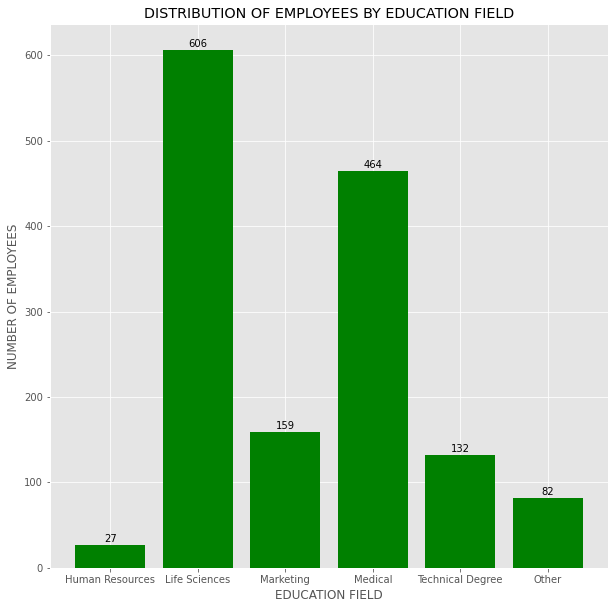

In [7]:
style.use('ggplot')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
edu_bar = ax.bar(fields, no_of_employees, facecolor='g')

# Set title
ax.set_title("DISTRIBUTION OF EMPLOYEES BY EDUCATION FIELD")
ax.set_xlabel('EDUCATION FIELD')
ax.set_ylabel('NUMBER OF EMPLOYEES')

ax.bar_label(edu_bar, padding=1)

x = np.arange(len(fields))
ax.set_xticks(x, fields)

plt.show()

In [ ]:
# Configure the histogram plot to show course as labels